# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import citipy

# Import API key

import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
citipy

<module 'citipy.citipy' from 'C:\\Users\\jburr\\Anaconda3\\lib\\site-packages\\citipy\\citipy.py'>

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lats_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lats_lng in lats_lngs:
    city = citipy.nearest_city(lats_lng[0], lats_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

588

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# Checking to see if cities returns some values
cities[0:10]

['kavieng',
 'arraial do cabo',
 'rikitea',
 'avarua',
 'tasiilaq',
 'busselton',
 'juneau',
 'cidreira',
 'katsuura',
 'yulara']

In [10]:
api_key = api_keys.api_key

# Constructing URL
query_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [11]:
# Setting variables
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1

# Print log for each city
print(f"Data Retrieval in Progress")
print(f"---------------------------")

# looping through city in cities
for city in cities:
    try: 
        response = requests.get(f"{query_url}&q={city}").json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]

        print(f"Processing Record {record} | {city_record}")
        
        record = record + 1
    
    except:
        print("City not found... skipping.")
    
    continue

Data Retrieval in Progress
---------------------------
Processing Record 1 | Kavieng
Processing Record 2 | Arraial do Cabo
Processing Record 3 | Rikitea
Processing Record 4 | Avarua
Processing Record 5 | Tasiilaq
Processing Record 6 | Busselton
Processing Record 7 | Juneau
Processing Record 8 | Cidreira
Processing Record 9 | Katsuura
Processing Record 10 | Yulara
Processing Record 11 | Kupang
City not found... skipping.
Processing Record 12 | Mahanoro
Processing Record 13 | Ushuaia
Processing Record 14 | Dikson
Processing Record 15 | Tuktoyaktuk
Processing Record 16 | Cape Town
Processing Record 17 | Butaritari
Processing Record 18 | Hermanus
Processing Record 19 | Havoysund
Processing Record 20 | Hobart
Processing Record 21 | Cherskiy
Processing Record 22 | Aykhal
Processing Record 23 | Codo
Processing Record 24 | Lorengau
Processing Record 25 | Ongandjera
Processing Record 26 | Ravar
Processing Record 27 | Khatanga
City not found... skipping.
City not found... skipping.
City not foun

Processing Record 226 | Wewak
Processing Record 227 | La Reforma
Processing Record 228 | Dingle
Processing Record 229 | Tocopilla
Processing Record 230 | Lima
Processing Record 231 | Tambacounda
Processing Record 232 | Mahebourg
Processing Record 233 | Tornio
Processing Record 234 | Koryukivka
City not found... skipping.
Processing Record 235 | Waingapu
Processing Record 236 | Springbok
City not found... skipping.
Processing Record 237 | Dalbandin
Processing Record 238 | Flinders
Processing Record 239 | Port Hueneme
Processing Record 240 | Phan Thiet
Processing Record 241 | Tezu
Processing Record 242 | San Cristobal
Processing Record 243 | Tautira
Processing Record 244 | Tab
Processing Record 245 | Zhigansk
Processing Record 246 | Leshukonskoye
Processing Record 247 | Khandyga
City not found... skipping.
Processing Record 248 | Grand Gaube
Processing Record 249 | Sao Joao da Barra
Processing Record 250 | Alyangula
Processing Record 251 | Santa Rosa
Processing Record 252 | Cap Malheureu

Processing Record 459 | Higueron
Processing Record 460 | Gondanglegi
Processing Record 461 | Axim
Processing Record 462 | Novyy Urengoy
Processing Record 463 | Yagodnoye
City not found... skipping.
Processing Record 464 | Ciudad Bolivar
Processing Record 465 | Weiser
Processing Record 466 | Mozarlandia
Processing Record 467 | Jiwani
Processing Record 468 | Shilong
Processing Record 469 | Shagonar
Processing Record 470 | Nanning
Processing Record 471 | Ilulissat
Processing Record 472 | Xining
Processing Record 473 | Natal
Processing Record 474 | San Andres
Processing Record 475 | Uenohara
Processing Record 476 | Mbale
Processing Record 477 | Cordoba
Processing Record 478 | Saint-Augustin
Processing Record 479 | Praya
Processing Record 480 | Havelock
Processing Record 481 | Vilhena
Processing Record 482 | Magadan
Processing Record 483 | Wagar
City not found... skipping.
Processing Record 484 | Kendari
Processing Record 485 | Bandar-e Lengeh
Processing Record 486 | Suntar
City not found..

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
weather_data.to_csv("weather_stats.csv")

In [16]:
weather_df = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

weather_stats = pd.DataFrame(weather_df)
weather_stats.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kavieng,32,PG,1539305420,95,-2.57,150.80,86.89,10.22
1,Arraial do Cabo,100,BR,1539305385,97,-22.97,-42.02,73.97,4.18
2,Rikitea,92,PF,1539305403,100,-23.12,-134.97,71.14,10.56
3,Avarua,75,CK,1539302400,69,-21.21,-159.78,77.00,17.22
4,Tasiilaq,92,GL,1539301800,100,65.61,-37.64,32.00,11.41


In [17]:
weather_stats.count()

City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

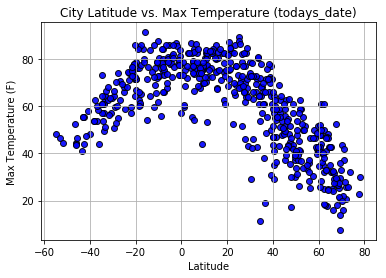

In [48]:
x_axis = weather_stats['Lat']
y_axis = weather_stats['Max Temp']
todays_date = time.strftime("%d/%m/%Y")

plt.scatter(x_axis, y_axis, color='blue', edgecolors='black', alpha=.9)

plt.title("City Latitude vs. Max Temperature (todays_date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

plt.savefig("Images")
plt.show()

#### Latitude vs. Humidity Plot

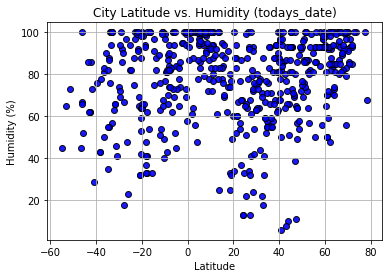

In [47]:
x_axis = weather_stats['Lat']
y_axis = weather_stats['Humidity']
todays_date = time.strftime("%d/%m/%Y")

plt.scatter(x_axis, y_axis, color='blue', edgecolors='black', alpha=.9)

plt.title("City Latitude vs. Humidity (todays_date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.savefig("Images_2")
plt.show()

#### Latitude vs. Cloudiness Plot

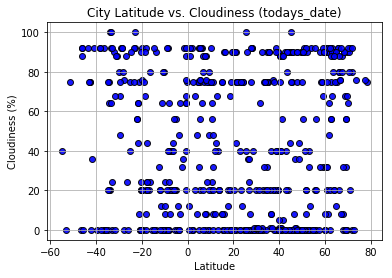

In [46]:
x_axis = weather_stats['Lat']
y_axis = weather_stats['Cloudiness']
todays_date = time.strftime("%d/%m/%Y")

plt.scatter(x_axis, y_axis, color='blue', edgecolors='black', alpha=.9)

plt.title("City Latitude vs. Cloudiness (todays_date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.savefig("Images_3")
plt.show()

#### Latitude vs. Wind Speed Plot

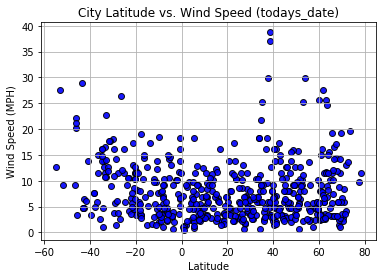

In [50]:
x_axis = weather_stats['Lat']
y_axis = weather_stats['Wind Speed']
todays_date = time.strftime("%d/%m/%Y")

plt.scatter(x_axis, y_axis, color='blue', edgecolors='black', alpha=.9)

plt.title("City Latitude vs. Wind Speed (todays_date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid()

plt.savefig("Images_4")
plt.show()

### Analysis

Max Temperatures tend to be the highest between -20 and 20 degrees latitude

There is no strong correlation between latitude and humidity.  Higher humidities exist anwywhere between our lines of latitude

Wind speeds tend to be lower the closer you get to line 0 of latitude 